# Case Study on Probability for Data Science 

Problem Statement: 
To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read dataset 
data=pd.read_csv("mushrooms.csv")

In [3]:
#Diplaying first 5 values
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Displaying bottom 5 values
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
#Displying information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#Checking shape of the dataset
data.shape

(8124, 23)

In [7]:
#Checking the presence of null values 
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null values in our dataset

In [8]:
#Checking statistical values of the dataset
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
#Checking data types of the variables
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All are object data types so we need to perform any encoding methods here 

### ENCODING 

In [10]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [11]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We can see tht the column veil-type includes same value in all rows and not contributing to our model so we can drop tht column

In [12]:
data=data.drop(["veil-type"],axis=1)

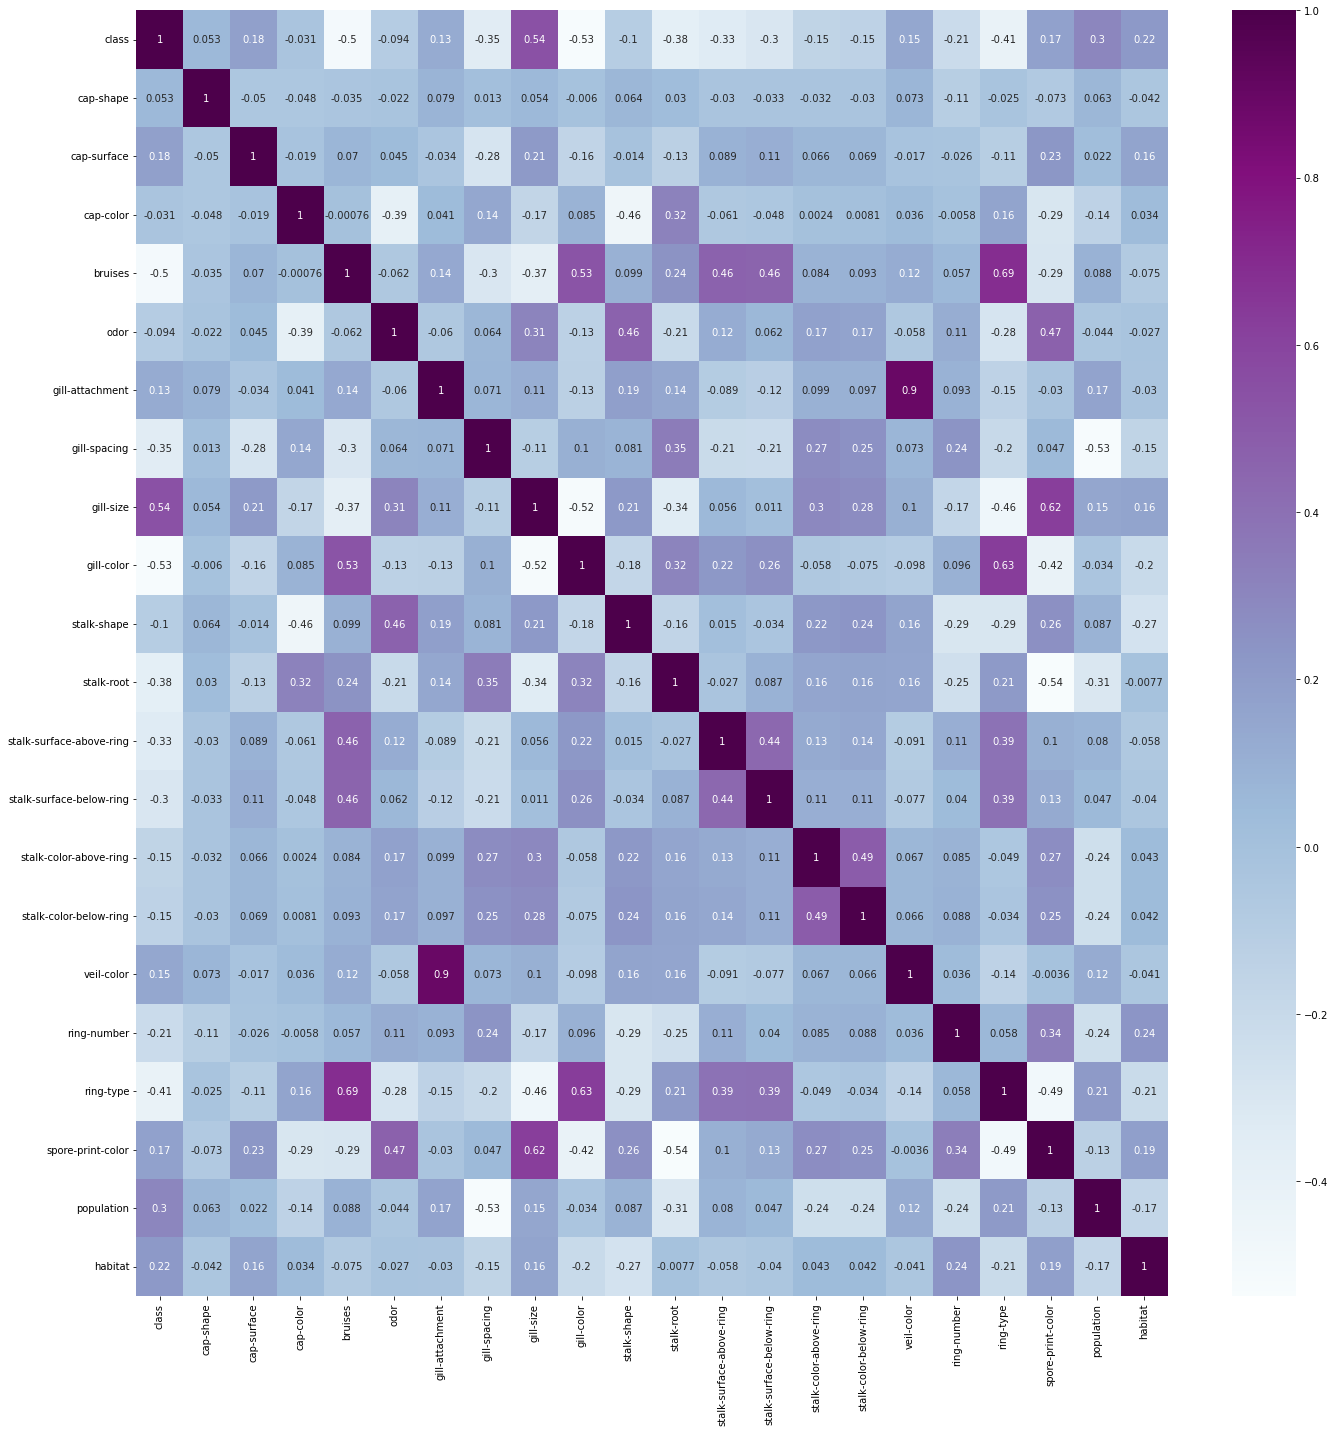

In [13]:
#Heatmap for the dataset
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True , cmap='BuPu')
plt.tight_layout()
plt.show()

In [14]:
#Scatter plot for population and habitat with respect to class

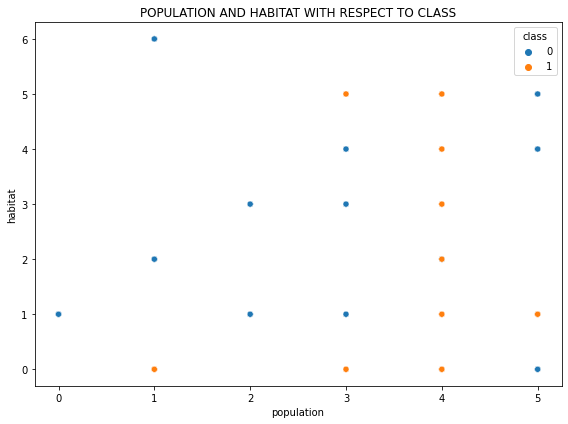

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['population'],y=data['habitat'], hue=data['class'])
plt.title('POPULATION AND HABITAT WITH RESPECT TO CLASS')
plt.xlabel('population')
plt.tight_layout()
plt.show()

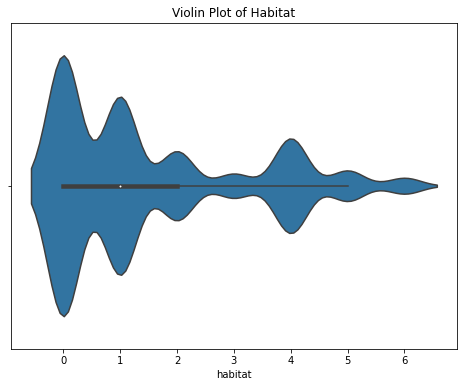

In [16]:
#Violin plot for habitat
plt.figure(figsize=(8,6))
sns.violinplot(data['habitat'])
plt.title('Violin Plot of Habitat')
plt.show()

## PREPARING DATA INTO TRAIN AND TEST DATA

In [17]:
from sklearn.model_selection import train_test_split
x= data.drop(['class'], axis=1)
y = data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)

## DIFFERENT CLASSIFICATION METHODS

### 1.LOGISTIC REGRESSION CLASSIFICATION

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(x_train, y_train)
y_pred_lr= lr.predict(x_test)

In [19]:
#Checking the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is :', accuracy_score(y_test,y_pred_lr))
print('Precision is :', precision_score(y_test,y_pred_lr))
print('Recall is :', recall_score(y_test,y_pred_lr))
print('f1 Score is :', f1_score(y_test,y_pred_lr))

Accuracy is : 0.9476923076923077
Precision is : 0.9439490445859873
Recall is : 0.9475703324808185
f1 Score is : 0.9457562220804084


In [20]:
print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))

Test Accuracy: 94.77%


In [21]:
#Calculating the confusion matrix
confusion_matrix(y_test, y_pred_lr)

array([[799,  44],
       [ 41, 741]], dtype=int64)

## 2.DECISION TREE CLASSIFICATION

In [22]:
#Importing library and then creating the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred_dt = model.predict(x_test)

In [23]:
#Checking the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_pred_dt))
print('Precision is :', precision_score(y_test,y_pred_dt))
print('Recall is :', recall_score(y_test,y_pred_dt))
print('f1 Score is :', f1_score(y_test,y_pred_dt))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


In [24]:
print("Test Accuracy: {}%".format(round(model.score(x_test, y_test)*100,2)))

Test Accuracy: 100.0%


## 3.KNN CLASSIFIER

In [25]:
#loading the Library
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(1,10)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred_knn)
    acc_values.append(acc)

In [26]:
#Printing acc_value
print(acc_values)

[0.9993846153846154, 0.9993846153846154, 0.9981538461538462, 0.9963076923076923, 0.9963076923076923, 0.9969230769230769, 0.9956923076923077, 0.9950769230769231, 0.9950769230769231]


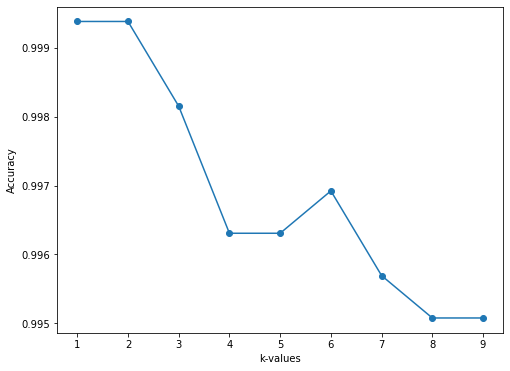

In [27]:
#Plotting graph to identify the n_neighbors
plt.figure(figsize=(8,6))
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k-values')
plt.ylabel('Accuracy')
plt.show()

We will take k values as 2

In [28]:
#Using n_neighbors=2
classifier = KNeighborsClassifier(n_neighbors=2, metric = 'minkowski')
classifier.fit(x_train, y_train)
y_pred_knn= classifier.predict(x_test)

In [29]:
#Checking the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_pred_knn))
print('Precision is :', precision_score(y_test,y_pred_knn))
print('Recall is :', recall_score(y_test,y_pred_knn))
print('f1 Score is :', f1_score(y_test,y_pred_knn))

Accuracy is : 0.9993846153846154
Precision is : 0.9987228607918263
Recall is : 1.0
f1 Score is : 0.9993610223642173


In [30]:
print("Test Accuracy: {}%".format(round(classifier.score(x_test, y_test)*100,2)))

Test Accuracy: 99.94%


## 4.RANDOM FOREST CLASSIFIER

In [31]:
#Importing library and creating model
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)
y_pred_r=random.predict(x_test)

In [32]:
#Checking the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_pred_r))
print('Precision is :', precision_score(y_test,y_pred_r))
print('Recall is :', recall_score(y_test,y_pred_r))
print('f1 Score is :', f1_score(y_test,y_pred_r))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


In [33]:
print("Test Accuracy: {}%".format(round(random.score(x_test, y_test)*100,2)))

Test Accuracy: 100.0%


## 5.SVM

LINEAR SVM

In [34]:
#Import library and create model to fit
from sklearn.svm import SVC
svm_l= SVC(kernel='linear')
svm_l.fit(x_train, y_train)
y_pred_svml = svm_l.predict(x_test)

In [35]:
#Checking the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_pred_svml))
print('Precision is :', precision_score(y_test,y_pred_svml))
print('Recall is :', recall_score(y_test,y_pred_svml))
print('f1 Score is :', f1_score(y_test,y_pred_svml))

Accuracy is : 0.9729230769230769
Precision is : 0.9817232375979112
Recall is : 0.9616368286445013
f1 Score is : 0.9715762273901808


In [36]:
print("Test Accuracy: {}%".format(round(svm_l.score(x_test, y_test)*100,2)))

Test Accuracy: 97.29%


POLYNOMIAL SVM

In [37]:
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(x_train,y_train)
y_pred_svmpoly = svm_poly.predict(x_test)

In [38]:
#Checking the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_pred_svmpoly))
print('Precision is :', precision_score(y_test,y_pred_svmpoly))
print('Recall is :', recall_score(y_test,y_pred_svmpoly))
print('f1 Score is :', f1_score(y_test,y_pred_svmpoly))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


In [39]:
print("Test Accuracy: {}%".format(round(svm_poly.score(x_test, y_test)*100,2)))

Test Accuracy: 100.0%


RADIAL SVM

In [40]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train, y_train)
y_pred_svm= svm_radial.predict(x_test)

In [41]:
#Checking the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_pred_svm))
print('Precision is :', precision_score(y_test,y_pred_svm))
print('Recall is :', recall_score(y_test,y_pred_svm))
print('f1 Score is :', f1_score(y_test,y_pred_svm))

Accuracy is : 0.9938461538461538
Precision is : 0.9987080103359173
Recall is : 0.9884910485933504
f1 Score is : 0.993573264781491


In [42]:
print("Test Accuracy: {}%".format(round(svm_radial.score(x_test, y_test)*100,2)))

Test Accuracy: 99.38%


## 6.NAIVE BAYES CLASSIFIER

GAUSSIAN NAIVE BAYES METHOD

In [43]:
from sklearn.naive_bayes import GaussianNB
naive_b= GaussianNB()
naive_b.fit(x_train, y_train)
y_pred_nb = naive_b.predict(x_test)

In [44]:
print("Test Accuracy: {}%".format(round(naive_b.score(x_test, y_test)*100,2)))

Test Accuracy: 92.18%


BERNOULLI NAIVE BAYES METHOD

In [45]:
from sklearn.naive_bayes import BernoulliNB
naive_bs=BernoulliNB()
naive_bs.fit(x_train, y_train)
y_pred_nbs=naive_bs.predict(x_test)

In [46]:
print("Test Accuracy: {}%".format(round(naive_bs.score(x_test, y_test)*100,2)))

Test Accuracy: 84.18%


#### FROM ALL THE ABOVE CLASSIFICATION USED WE CAN CONCLUDE THAT MANY OF THE CLASSIFICATION METHODS HITS 100% ACCURACY  WITH THIS DATASET.
 